In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.layers
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score, precision_score, recall_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

#from sklearn.datasets import make_regression, make_classification

import matplotlib.pyplot as plt
from keras.models import model_from_json

In [37]:
bbdata = pd.read_excel ('Copy of Biotic-biotic.xlsx', sheet_name='Biotic-Biotic')
bbdata=pd.DataFrame.from_records(bbdata)
#bbdata.columns=bbdata.loc[0]
#bbdata=bbdata[1:]
bbdata.reset_index(inplace=True)
bbdata=bbdata.drop(['index','S.No.'],axis=1)

bbdata.head()



,Stress combination,Plant species,Family,Treatments,Simultaneous,Sequential,Plant performance,Average temperature,Parameter,Salt,...,Ozone,Waterlogging,Bacteria,Fungus,Oomycete,Virus,Nematode,Insect,Mites,Type
0,Bacteria and nematode,Potato,Solanaceae,Bacteria,0,0,56.82,18.5,Shoot weight,0,...,0,No Waterlogging,Ralstonia sola0cearum,0,0,0,0,0,0,Biotic-biotic
1,Bacteria and nematode,Tomato,Solanaceae,Bacteria,0,0,8.24,15.0,Shoot weight,0,...,0,No Waterlogging,Ralstonia sola0cearum,0,0,0,0,0,0,Biotic-biotic
2,Virus and bacteria,Potato,Solanaceae,Bacteria (Corynebacterium sepedonicum),0,0,38.49,18.5,Yield,0,...,0,No Waterlogging,Corynebacterium sepedonicum,0,0,0,0,0,0,Biotic-biotic
3,Fungus and Fungus,Wheat,Poaceae,Fungus,0,0,40.07,22.5,Yield,0,...,0,No Waterlogging,0,Cochliobolus sativus,0,0,0,0,0,Biotic-biotic
4,Fungus and Fungus,Wheat,Poaceae,Fungus and Fungus,0,1,20.16,22.5,Yield,0,...,0,No Waterlogging,0,"Cochliobolus sativus, Pyrenophora tritici-repe...",0,0,0,0,0,Biotic-biotic


In [38]:
aadata = pd.read_excel ('Copy of Abiotic-abiotic.xlsx', sheet_name='Abiotic-Abiotic stress combinat')
aadata=pd.DataFrame.from_records(aadata)
#bbdata.columns=bbdata.loc[0]
#bbdata=bbdata[1:]
aadata.reset_index(inplace=True)
aadata=aadata.drop(['index','S.No.'],axis=1)

aadata.head()



,Stress combination,Plant species,Family,Treatments,Simultaneous,Sequential,Plant performance,Parameter,Salt,Average temperature,Drought,Light intensity,Shade,Boron,Lead,Cd,UV,Ozone,Waterlogging,Type
0,Cold and UV,Cotton,Malvaceae,Cold,NaN,0,15.8,Plant height,0,20.0,0,Optimum light,No shade,30.0,0,0,1.0,0,No Waterlogging,Abiotic-abiotic
1,Cold and UV,Cotton,Malvaceae,UV,NaN,0,5.3,Plant height,0,26.5,0,Optimum light,No shade,30.0,0,0,10.0,10,No Waterlogging,Abiotic-abiotic
2,Cold and UV,Cotton,Malvaceae,Cold and UV,NaN,1,10.5,Plant height,0,20.0,0,Optimum light,No shade,30.0,0,0,10.0,0,No Waterlogging,Abiotic-abiotic
3,Cold and UV,Cotton,Malvaceae,Cold,NaN,0,44.8,Root length,0,20.0,0,Optimum light,No shade,30.0,0,0,1.0,0,No Waterlogging,Abiotic-abiotic
4,Cold and UV,Cotton,Malvaceae,UV- B,NaN,0,5.5,Root length,0,26.5,0,Optimum light,No shade,30.0,0,0,10.0,0,No Waterlogging,Abiotic-abiotic


In [39]:
abdata = pd.read_excel ('Copy of Abiotic-biotic.xlsx', sheet_name='Abiotic-biotic')
abdata=pd.DataFrame.from_records(abdata)
#bbdata.columns=bbdata.loc[0]
#bbdata=bbdata[1:]
abdata.reset_index(inplace=True)
abdata=abdata.drop(['index','S.No.'],axis=1)

abdata.head()

,Stress combination,Plant species,Family,Treatments,Simultaneous,Sequential,Plant performance,Parameter,Salt,Average temperature,...,UV,Ozone,Waterlogging,Bacteria,Fungus,Virus,Insect,Nematode,Weed,Type
0,Drought and bacteria,Virginia creeper,Vitaceae,Drought stress,0,NaN,29.20,Plant height,0,21.5,...,1.0,0.0,No waterlogging,0,0,0,0,0,0,Abiotic-biotic
1,Drought and bacteria,Virginia creeper,Vitaceae,Bacteria (Xylella fastidiosa),0,NaN,17.30,Plant height,0,21.5,...,1.0,0.0,No waterlogging,Xylella fastidiosa,0,0,0,0,0,Abiotic-biotic
2,Drought and bacteria,Virginia creeper,Vitaceae,Drought and bacteria,0,1.0,48.50,Plant height,0,21.5,...,1.0,0.0,No waterlogging,Xylella fastidiosa,0,0,0,0,0,Abiotic-biotic
3,Drought and virus,Thalecress,Brassicaceae,Drought,0,NaN,22.97,Biomass,0,22.0,...,1.0,0.0,No waterlogging,0,0,0,0,0,0,Abiotic-biotic
4,Drought and virus,Thalecress,Brassicaceae,Virus (Turnip mosaic virus),0,NaN,15.93,Biomass,0,22.0,...,1.0,0.0,No waterlogging,0,0,Turnip mosaic virus,0,0,0,Abiotic-biotic


In [40]:
bbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stress combination   308 non-null    object 
 1   Plant species        308 non-null    object 
 2   Family               308 non-null    object 
 3   Treatments           308 non-null    object 
 4   Simultaneous         308 non-null    int64  
 5   Sequential           308 non-null    int64  
 6   Plant performance    308 non-null    float64
 7   Average temperature  308 non-null    float64
 8   Parameter            308 non-null    object 
 9   Salt                 308 non-null    int64  
 10  Drought              308 non-null    int64  
 11  Boron                308 non-null    int64  
 12  Cd                   308 non-null    int64  
 13  UV                   308 non-null    int64  
 14  Ozone                308 non-null    int64  
 15  Waterlogging         308 non-null    obj

In [41]:
bbdata['Salt'].value_counts()

0    308
Name: Salt, dtype: int64

In [42]:
abdata['Salt'].value_counts()

0    157
2      8
1      2
Name: Salt, dtype: int64

In [43]:
aadata['Salt'].value_counts()

0      168
2       54
1       10
20       4
50       4
150      3
Name: Salt, dtype: int64

In [44]:
aadata['Drought'].value_counts()

0    194
2     45
1      4
Name: Drought, dtype: int64

In [45]:
abdata['Drought'].value_counts()

0    155
1      6
2      6
Name: Drought, dtype: int64

In [46]:
bbdata['Drought'].value_counts()

0    308
Name: Drought, dtype: int64

In [47]:
bbdata['Waterlogging'].value_counts()

No Waterlogging    308
Name: Waterlogging, dtype: int64

In [48]:
abdata['Waterlogging'].value_counts()

No waterlogging                      91
Waterlogging 20days post anthesis    36
Waterlogging till maturity           21
Waterlogging for 4 days               6
Waterlogging for 8 days               5
Waterlogging for 3days                4
Waterlogging for 25 days              4
Name: Waterlogging, dtype: int64

In [49]:
aadata['Waterlogging'].value_counts()

No Waterlogging            200
Waterlogging                17
Waterlogging for 5 days     11
waterlogging for 6 days      6
No waterlogging              5
Waterlogging for 6 days      3
Waterlogging for 3 days      1
Name: Waterlogging, dtype: int64

In [50]:
bbdata['Waterlogging']=0
aadata['Waterlogging']=aadata['Waterlogging'].apply(lambda x: 0 if(x=='No Waterlogging' or x=='No waterlogging') else 1)
abdata['Waterlogging']=abdata['Waterlogging'].apply(lambda x: 0 if(x=='No waterlogging') else 1)

In [51]:
abdata['Nematode'].value_counts()

0                           131
Meloidogyne incognita        14
Pratylenchus zeae            10
Meloidogyne  graminicola      4
Meloidogyne graminicola       4
Meloidogyne javanica          2
Pratylenchus penetrans        2
Name: Nematode, dtype: int64

In [52]:
abdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stress combination   167 non-null    object 
 1   Plant species        167 non-null    object 
 2   Family               167 non-null    object 
 3   Treatments           167 non-null    object 
 4   Simultaneous         167 non-null    int64  
 5   Sequential           58 non-null     float64
 6   Plant performance    167 non-null    float64
 7   Parameter            167 non-null    object 
 8   Salt                 167 non-null    int64  
 9   Average temperature  167 non-null    float64
 10  Drought              167 non-null    int64  
 11  Boron                167 non-null    int64  
 12  Cd                   167 non-null    float64
 13  Mn                   167 non-null    int64  
 14  Pb                   167 non-null    int64  
 15  Zinc                 167 non-null    int

In [53]:
abdata['Weed'].value_counts()

0                                                      160
Agropyron repens                                         2
Ehinochloa colo0, Cyperus iria and Jussia linifolia      2
Aegilops tauschii                                        2
Sugarbeet Knot grass , White goosefoot                   1
Name: Weed, dtype: int64

In [54]:
abdata['Simultaneous']=0
abdata.loc[abdata['Sequential']=='','Sequential']=0

aadata['Simultaneous']=0
#aadata.loc[aadata['Sequential']=='','Sequential']=0
aadata['Sequential'].value_counts()

0    165
1     78
Name: Sequential, dtype: int64

In [55]:
bbdata['Plant performance']=bbdata['Plant performance'].astype(float)
bbdata['Average temperature']=bbdata['Average temperature'].astype(float)
bbdata['Salt']=bbdata['Salt'].astype(int)
bbdata['Drought']=bbdata['Drought'].astype(int)
bbdata['Boron']=bbdata['Boron'].astype(float)
bbdata['Cd']=bbdata['Cd'].astype(float)
bbdata['UV']=bbdata['UV'].astype(float)
bbdata['Ozone']=bbdata['Ozone'].astype(float)
bbdata['Simultaneous']=bbdata['Simultaneous'].astype(float)
bbdata['Sequential']=bbdata['Sequential'].astype(float)
bbdata['Waterlogging']=bbdata['Waterlogging'].astype(int)

In [56]:
abdata['Plant performance']=abdata['Plant performance'].astype(float)
abdata['Average temperature']=abdata['Average temperature'].astype(float)
abdata['Salt']=abdata['Salt'].astype(int)
abdata['Drought']=abdata['Drought'].astype(int)
abdata['Boron']=abdata['Boron'].astype(float)
abdata['Cd']=abdata['Cd'].astype(float)
abdata['Mn']=abdata['Mn'].astype(int)
abdata['Pb']=abdata['Pb'].astype(int)
abdata['Zinc']=abdata['Zinc'].astype(int)
abdata['Ni']=abdata['Ni'].astype(int)
abdata['UV']=abdata['UV'].astype(float)
abdata['Ozone']=abdata['Ozone'].astype(float)
abdata['Simultaneous']=abdata['Simultaneous'].astype(float)
abdata['Sequential']=abdata['Sequential'].astype(float)
abdata['Waterlogging']=abdata['Waterlogging'].astype(int)

In [57]:
#aadata.drop([10,16,75,204],axis=0,inplace=True)

In [58]:
aadata.drop(aadata[aadata['UV']=='UV exposure for 60 min'].index.tolist(),inplace=True)
aadata.drop(aadata[aadata['UV']=='UV B radiation for 30 min'].index.tolist(),inplace=True)
aadata.drop(aadata[aadata['UV']=='10-14W/m2'].index.tolist(),inplace=True)
aadata.drop(aadata[aadata['UV']==''].index.tolist(),inplace=True)

In [59]:
aadata['Simultaneous'].value_counts()

0    243
Name: Simultaneous, dtype: int64

In [60]:
aadata['Light intensity'].value_counts()

Optimum light    237
High light         4
Low light          2
Name: Light intensity, dtype: int64

In [61]:
#aadata['Light intensity']=aadata['Light intensity'].apply(lambda x: 1 if(x=='Optimum light') else 0)
aadata['Shade']=aadata['Shade'].apply(lambda x: 0 if(x=='No shade') else 1)

In [62]:
aadata['Shade'].value_counts()

0    239
1      4
Name: Shade, dtype: int64

In [63]:
#aadata.drop(aadata[aadata['Ozone']=='NA'].index.tolist(),inplace=True)
#aadata.drop(aadata[aadata['Ozone']=='110'].index.tolist(),inplace=True)
#aadata.drop(aadata[aadata['Ozone']=='85'].index.tolist(),inplace=True)
#aadata.drop(aadata[aadata['Ozone']=='88'].index.tolist(),inplace=True)
#aadata.drop(aadata[aadata['Ozone']=='70'].index.tolist(),inplace=True)

In [64]:
aadata['Plant performance']=aadata['Plant performance'].astype(float)
aadata['Average temperature']=aadata['Average temperature'].astype(float)
aadata['Salt']=aadata['Salt'].astype(int)
aadata['Drought']=aadata['Drought'].astype(int)
aadata['Boron']=aadata['Boron'].astype(float)
aadata['Cd']=aadata['Cd'].astype(float)
aadata['Lead']=aadata['Lead'].astype(float)
aadata['UV']=aadata['UV'].astype(float)
aadata['Ozone']=aadata['Ozone'].astype(float)
aadata['Simultaneous']=aadata['Simultaneous'].astype(float)
aadata['Sequential']=aadata['Sequential'].astype(float)
aadata['Waterlogging']=aadata['Waterlogging'].astype(int)

aadata.drop('Treatments',axis=1,inplace=True)

In [65]:
bbdata['Oomycete']=bbdata['Oomycete'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
bbdata['Virus']=bbdata['Virus'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
bbdata['Insect']=bbdata['Insect'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
bbdata['Nematode']=bbdata['Nematode'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
bbdata['Fungus']=bbdata['Fungus'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
bbdata['Bacteria']=bbdata['Bacteria'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)

bbdata.drop(['Mites','Treatments'],axis=1,inplace=True)

In [66]:
abdata['Weed']=abdata['Weed'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
abdata['Virus']=abdata['Virus'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
abdata['Insect']=abdata['Insect'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
abdata['Nematode']=abdata['Nematode'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
abdata['Fungus']=abdata['Fungus'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
abdata['Bacteria']=abdata['Bacteria'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)

abdata.drop('Treatments',axis=1,inplace=True)

Function to create repetitions of rows with +-0.05 variation in plant performance and temperature column

In [67]:
pd.options.mode.chained_assignment = None
def repetition(df):
  for i in range(len(df)):
    row=df.loc[i]
    plant=row['Plant performance']
    temp=row['Average temperature']
    for j in range(1,6):
      #dfcopy=df.append(row)
      row['Plant performance']=plant-j*0.05
      row['Average temperature']=temp-j*0.05
      df=df.append(row)
    #dfcopy['Plant performance']=row['Plant performance']-i*0.05
    #dfcopy['Temperature']=row['Temperature']-i*0.05

    for j in range(1,6):
      row['Plant performance']=plant+j*0.05
      row['Average temperature']=temp+j*0.05
      df=df.append(row)
  return df
    # dfcopy=dfcopy.append(row)
    # dfcopy['Plant performance']=row['Plant performance']+i*0.05
    # dfcopy['Temperature']=row['Temperature']+i*0.05

  

In [68]:
bbdata1=repetition(bbdata).copy()
bbdata1.info()
bbdata1=bbdata1.reset_index()
bbdata1[bbdata1['index']==0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3388 entries, 0 to 307
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stress combination   3388 non-null   object 
 1   Plant species        3388 non-null   object 
 2   Family               3388 non-null   object 
 3   Simultaneous         3388 non-null   float64
 4   Sequential           3388 non-null   float64
 5   Plant performance    3388 non-null   float64
 6   Average temperature  3388 non-null   float64
 7   Parameter            3388 non-null   object 
 8   Salt                 3388 non-null   int32  
 9   Drought              3388 non-null   int32  
 10  Boron                3388 non-null   float64
 11  Cd                   3388 non-null   float64
 12  UV                   3388 non-null   float64
 13  Ozone                3388 non-null   float64
 14  Waterlogging         3388 non-null   int32  
 15  Bacteria             3388 non-null   in

,index,Stress combination,Plant species,Family,Simultaneous,Sequential,Plant performance,Average temperature,Parameter,Salt,...,UV,Ozone,Waterlogging,Bacteria,Fungus,Oomycete,Virus,Nematode,Insect,Type
0,0,Bacteria and nematode,Potato,Solanaceae,0.0,0.0,56.82,18.50,Shoot weight,0,...,1.0,0.0,0,1,1,1,1,1,1,Biotic-biotic
308,0,Bacteria and nematode,Potato,Solanaceae,0.0,0.0,56.77,18.45,Shoot weight,0,...,1.0,0.0,0,1,1,1,1,1,1,Biotic-biotic
309,0,Bacteria and nematode,Potato,Solanaceae,0.0,0.0,56.72,18.40,Shoot weight,0,...,1.0,0.0,0,1,1,1,1,1,1,Biotic-biotic
310,0,Bacteria and nematode,Potato,Solanaceae,0.0,0.0,56.67,18.35,Shoot weight,0,...,1.0,0.0,0,1,1,1,1,1,1,Biotic-biotic
311,0,Bacteria and nematode,Potato,Solanaceae,0.0,0.0,56.62,18.30,Shoot weight,0,...,1.0,0.0,0,1,1,1,1,1,1,Biotic-biotic
312,0,Bacteria and nematode,Potato,Solanaceae,0.0,0.0,56.57,18.25,Shoot weight,0,...,1.0,0.0,0,1,1,1,1,1,1,Biotic-biotic
313,0,Bacteria and nematode,Potato,Solanaceae,0.0,0.0,56.87,18.55,Shoot weight,0,...,1.0,0.0,0,1,1,1,1,1,1,Biotic-biotic
314,0,Bacteria and nematode,Potato,Solanaceae,0.0,0.0,56.92,18.60,Shoot weight,0,...,1.0,0.0,0,1,1,1,1,1,1,Biotic-biotic
315,0,Bacteria and nematode,Potato,Solanaceae,0.0,0.0,56.97,18.65,Shoot weight,0,...,1.0,0.0,0,1,1,1,1,1,1,Biotic-biotic
316,0,Bacteria and nematode,Potato,Solanaceae,0.0,0.0,57.02,18.70,Shoot weight,0,...,1.0,0.0,0,1,1,1,1,1,1,Biotic-biotic


In [69]:
abdata1=repetition(abdata)
abdata1=abdata1.reset_index()
abdata1[abdata1['index']==0]

,index,Stress combination,Plant species,Family,Simultaneous,Sequential,Plant performance,Parameter,Salt,Average temperature,...,UV,Ozone,Waterlogging,Bacteria,Fungus,Virus,Insect,Nematode,Weed,Type
0,0,Drought and bacteria,Virginia creeper,Vitaceae,0.0,NaN,29.20,Plant height,0,21.50,...,1.0,0.0,0,1,1,1,1,1,1,Abiotic-biotic
167,0,Drought and bacteria,Virginia creeper,Vitaceae,0.0,NaN,29.15,Plant height,0,21.45,...,1.0,0.0,0,1,1,1,1,1,1,Abiotic-biotic
168,0,Drought and bacteria,Virginia creeper,Vitaceae,0.0,NaN,29.10,Plant height,0,21.40,...,1.0,0.0,0,1,1,1,1,1,1,Abiotic-biotic
169,0,Drought and bacteria,Virginia creeper,Vitaceae,0.0,NaN,29.05,Plant height,0,21.35,...,1.0,0.0,0,1,1,1,1,1,1,Abiotic-biotic
170,0,Drought and bacteria,Virginia creeper,Vitaceae,0.0,NaN,29.00,Plant height,0,21.30,...,1.0,0.0,0,1,1,1,1,1,1,Abiotic-biotic
171,0,Drought and bacteria,Virginia creeper,Vitaceae,0.0,NaN,28.95,Plant height,0,21.25,...,1.0,0.0,0,1,1,1,1,1,1,Abiotic-biotic
172,0,Drought and bacteria,Virginia creeper,Vitaceae,0.0,NaN,29.25,Plant height,0,21.55,...,1.0,0.0,0,1,1,1,1,1,1,Abiotic-biotic
173,0,Drought and bacteria,Virginia creeper,Vitaceae,0.0,NaN,29.30,Plant height,0,21.60,...,1.0,0.0,0,1,1,1,1,1,1,Abiotic-biotic
174,0,Drought and bacteria,Virginia creeper,Vitaceae,0.0,NaN,29.35,Plant height,0,21.65,...,1.0,0.0,0,1,1,1,1,1,1,Abiotic-biotic
175,0,Drought and bacteria,Virginia creeper,Vitaceae,0.0,NaN,29.40,Plant height,0,21.70,...,1.0,0.0,0,1,1,1,1,1,1,Abiotic-biotic


In [70]:
aadata.reset_index(inplace=True)
aadata.drop('index',axis=1,inplace=True)

aadata1=repetition(aadata)
aadata1=aadata1.reset_index()
aadata1[aadata1['index']==0]

,index,Stress combination,Plant species,Family,Simultaneous,Sequential,Plant performance,Parameter,Salt,Average temperature,Drought,Light intensity,Shade,Boron,Lead,Cd,UV,Ozone,Waterlogging,Type
0,0,Cold and UV,Cotton,Malvaceae,0.0,0.0,15.80,Plant height,0,20.00,0,Optimum light,0,30.0,0.0,0.0,1.0,0.0,0,Abiotic-abiotic
243,0,Cold and UV,Cotton,Malvaceae,0.0,0.0,15.75,Plant height,0,19.95,0,Optimum light,0,30.0,0.0,0.0,1.0,0.0,0,Abiotic-abiotic
244,0,Cold and UV,Cotton,Malvaceae,0.0,0.0,15.70,Plant height,0,19.90,0,Optimum light,0,30.0,0.0,0.0,1.0,0.0,0,Abiotic-abiotic
245,0,Cold and UV,Cotton,Malvaceae,0.0,0.0,15.65,Plant height,0,19.85,0,Optimum light,0,30.0,0.0,0.0,1.0,0.0,0,Abiotic-abiotic
246,0,Cold and UV,Cotton,Malvaceae,0.0,0.0,15.60,Plant height,0,19.80,0,Optimum light,0,30.0,0.0,0.0,1.0,0.0,0,Abiotic-abiotic
247,0,Cold and UV,Cotton,Malvaceae,0.0,0.0,15.55,Plant height,0,19.75,0,Optimum light,0,30.0,0.0,0.0,1.0,0.0,0,Abiotic-abiotic
248,0,Cold and UV,Cotton,Malvaceae,0.0,0.0,15.85,Plant height,0,20.05,0,Optimum light,0,30.0,0.0,0.0,1.0,0.0,0,Abiotic-abiotic
249,0,Cold and UV,Cotton,Malvaceae,0.0,0.0,15.90,Plant height,0,20.10,0,Optimum light,0,30.0,0.0,0.0,1.0,0.0,0,Abiotic-abiotic
250,0,Cold and UV,Cotton,Malvaceae,0.0,0.0,15.95,Plant height,0,20.15,0,Optimum light,0,30.0,0.0,0.0,1.0,0.0,0,Abiotic-abiotic
251,0,Cold and UV,Cotton,Malvaceae,0.0,0.0,16.00,Plant height,0,20.20,0,Optimum light,0,30.0,0.0,0.0,1.0,0.0,0,Abiotic-abiotic


Combining all datasets

In [71]:
df=bbdata1.append(abdata1,ignore_index=True)
df=df.append(aadata1,ignore_index=True)
df.drop('index',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7898 entries, 0 to 7897
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stress combination   7898 non-null   object 
 1   Plant species        7898 non-null   object 
 2   Family               7898 non-null   object 
 3   Simultaneous         7898 non-null   float64
 4   Sequential           6699 non-null   float64
 5   Plant performance    7898 non-null   float64
 6   Average temperature  7898 non-null   float64
 7   Parameter            7898 non-null   object 
 8   Salt                 7898 non-null   int32  
 9   Drought              7898 non-null   int32  
 10  Boron                7898 non-null   float64
 11  Cd                   7898 non-null   float64
 12  UV                   7887 non-null   float64
 13  Ozone                7898 non-null   float64
 14  Waterlogging         7898 non-null   int32  
 15  Bacteria             5225 non-null   f

In [72]:
df.head()

,Stress combination,Plant species,Family,Simultaneous,Sequential,Plant performance,Average temperature,Parameter,Salt,Drought,...,Insect,Type,Mn,Pb,Zinc,Ni,Weed,Light intensity,Shade,Lead
0,Bacteria and nematode,Potato,Solanaceae,0.0,0.0,56.82,18.5,Shoot weight,0,0,...,1.0,Biotic-biotic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bacteria and nematode,Tomato,Solanaceae,0.0,0.0,8.24,15.0,Shoot weight,0,0,...,1.0,Biotic-biotic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Virus and bacteria,Potato,Solanaceae,0.0,0.0,38.49,18.5,Yield,0,0,...,1.0,Biotic-biotic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungus and Fungus,Wheat,Poaceae,0.0,0.0,40.07,22.5,Yield,0,0,...,1.0,Biotic-biotic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungus and Fungus,Wheat,Poaceae,0.0,1.0,20.16,22.5,Yield,0,0,...,1.0,Biotic-biotic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df['Shade'].value_counts()

0.0    2629
1.0      44
Name: Shade, dtype: int64

In [74]:
df['Light intensity'].value_counts()

Optimum light    2607
High light         44
Low light          22
Name: Light intensity, dtype: int64

In [75]:
df['Light intensity']=df['Light intensity'].apply(lambda x: 1 if (x=='Optimum light') else (-1 if x=='Low light' else 0))

In [76]:
df.fillna(0,inplace=True)

In [77]:
df1=pd.get_dummies(df,columns=['Family','Type'],drop_first=True)
df1.head()

,Stress combination,Plant species,Simultaneous,Sequential,Plant performance,Average temperature,Parameter,Salt,Drought,Boron,...,Family_Linaceae,Family_Malvaceae,Family_Piperaceae,Family_Poaceae,Family_Rosaceae,Family_Solanaceae,Family_Theaceae,Family_Vitaceae,Type_Abiotic-biotic,Type_Biotic-biotic
0,Bacteria and nematode,Potato,0.0,0.0,56.82,18.5,Shoot weight,0,0,30.0,...,0,0,0,0,0,1,0,0,0,1
1,Bacteria and nematode,Tomato,0.0,0.0,8.24,15.0,Shoot weight,0,0,30.0,...,0,0,0,0,0,1,0,0,0,1
2,Virus and bacteria,Potato,0.0,0.0,38.49,18.5,Yield,0,0,30.0,...,0,0,0,0,0,1,0,0,0,1
3,Fungus and Fungus,Wheat,0.0,0.0,40.07,22.5,Yield,0,0,30.0,...,0,0,0,1,0,0,0,0,0,1
4,Fungus and Fungus,Wheat,0.0,1.0,20.16,22.5,Yield,0,0,30.0,...,0,0,0,1,0,0,0,0,0,1


In [78]:
df1.drop(['Stress combination','Plant species'],axis=1,inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7898 entries, 0 to 7897
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Simultaneous            7898 non-null   float64
 1   Sequential              7898 non-null   float64
 2   Plant performance       7898 non-null   float64
 3   Average temperature     7898 non-null   float64
 4   Parameter               7898 non-null   object 
 5   Salt                    7898 non-null   int32  
 6   Drought                 7898 non-null   int32  
 7   Boron                   7898 non-null   float64
 8   Cd                      7898 non-null   float64
 9   UV                      7898 non-null   float64
 10  Ozone                   7898 non-null   float64
 11  Waterlogging            7898 non-null   int32  
 12  Bacteria                7898 non-null   float64
 13  Fungus                  7898 non-null   float64
 14  Oomycete                7898 non-null   

In [79]:
df1.Parameter.value_counts().count()

51

In [80]:
df1=df1[df1['Parameter']!='Harvest Index']

In [81]:
p=pd.read_csv('../../../../param.csv')
p.head(10)

,Parameter,Count,New
0,Shoot weight,1507,Biomass
1,Yield,1386,Yield
2,Plant height,495,Plant growth
3,Biomass,330,Biomass
4,Total plant weight,297,Biomass
5,Shoot dry weight,297,Biomass
6,Biomass,275,Biomass
7,Root length,242,Plant growth
8,Leaf area,231,Plant growth
9,Dry weight,198,Biomass


In [82]:
p.Count.sum()

7293

In [83]:
p.Parameter.value_counts().count()

50

In [84]:
set(df1.Parameter.unique())-set(p.Parameter.unique())

{'Biomass ', 'Root dry mass', 'Seed yield/plant', 'root dry mass'}

In [85]:
p.New.value_counts()

Yield           18
Biomass         17
Plant growth    17
Name: New, dtype: int64

In [86]:
df1.loc[df1['Parameter']=='Biomass ','Parameter']='Biomass'
df1.loc[df1['Parameter']=='Root dry mass','Parameter']='Root dry weight'
df1.loc[df1['Parameter']=='root dry mass','Parameter']='Root dry weight'
df1.loc[df1['Parameter']=='Seed yield/plant','Parameter']='Seed yield'

In [87]:
p.iloc[6:]

,Parameter,Count,New
6,Biomass,275,Biomass
7,Root length,242,Plant growth
8,Leaf area,231,Plant growth
9,Dry weight,198,Biomass
10,Root dry weight,165,Biomass
11,Total dry weight,99,Biomass
12,Mean tuber weight,99,Yield
13,Fresh weight,99,Biomass
14,Grain yield,99,Yield
15,Weight per grain,99,Yield


In [88]:
p.drop(6,inplace=True)

In [89]:
df1=df1.merge(p,left_on='Parameter',right_on='Parameter',how='left')
#df1.drop(['Count','Unnamed: 3','Parameter','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)
df1.drop(['Count','Parameter'],axis=1,inplace=True)

#df1.drop('Parameter',axis=1,inplace=True)
df1=df1.rename(columns={'New':'Parameter'})
df1.shape

(7799, 47)

In [90]:
df1.Parameter.value_counts()

Biomass         3927
Yield           2376
Plant growth    1496
Name: Parameter, dtype: int64

<AxesSubplot:>

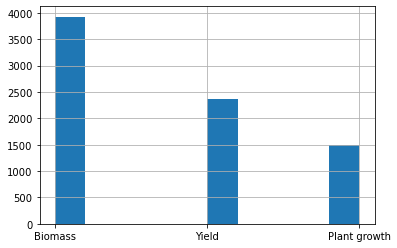

In [91]:
df1.Parameter.hist()

In [92]:
df1['Plant performance'].describe()

count    7799.000000
mean       29.247971
std        30.336165
min      -105.550000
25%        12.200000
50%        27.100000
75%        47.285000
max       269.050000
Name: Plant performance, dtype: float64

In [93]:
#df1.loc[5595:5605]

<AxesSubplot:>

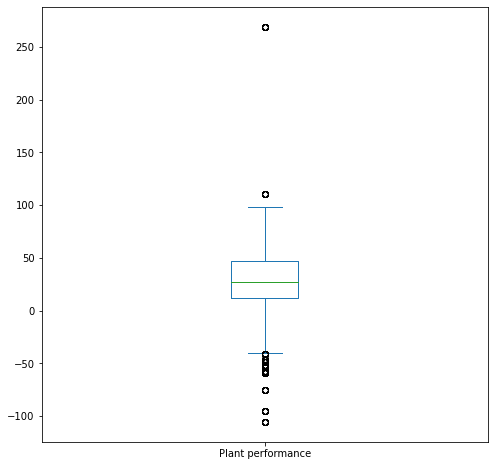

In [94]:
df1['Plant performance'].plot(kind='box',figsize=(8,8))

<AxesSubplot:>

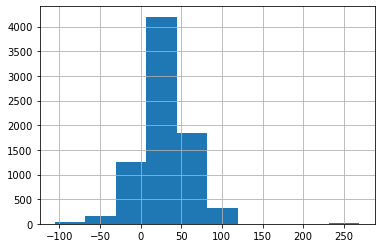

In [95]:
df1['Plant performance'].hist()

In [96]:
y = df1[['Plant performance','Parameter']].copy()
le=LabelEncoder()
y['Parameter']=le.fit_transform(y['Parameter'])

X_train, X_test, y_train, y_test = train_test_split(df1.drop(['Plant performance','Parameter'],axis=1), y, stratify = y.Parameter)

In [97]:
X_train

,Simultaneous,Sequential,Average temperature,Salt,Drought,Boron,Cd,UV,Ozone,Waterlogging,...,Family_Linaceae,Family_Malvaceae,Family_Piperaceae,Family_Poaceae,Family_Rosaceae,Family_Solanaceae,Family_Theaceae,Family_Vitaceae,Type_Abiotic-biotic,Type_Biotic-biotic
1791,0.0,1.0,24.80,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2170,1.0,0.0,21.35,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2794,0.0,0.0,20.60,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
3304,0.0,1.0,29.10,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1
6525,0.0,0.0,18.10,1,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0.0,0.0,27.70,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2198,1.0,0.0,14.95,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,1,0,0,0,1
7340,0.0,1.0,28.40,1,0,30.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2316,0.0,0.0,15.20,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,1,0,0,0,1


In [98]:
"""
X_train.to_csv('X_train_tanh1.csv')
X_test.to_csv('X_test_tanh1.csv')
y_train.to_csv('y_train_tanh1.csv')
y_test.to_csv('y_test_tanh1.csv')
"""

"\nX_train.to_csv('X_train_tanh1.csv')\nX_test.to_csv('X_test_tanh1.csv')\ny_train.to_csv('y_train_tanh1.csv')\ny_test.to_csv('y_test_tanh1.csv')\n"

In [99]:
#X_train = pd.read_csv('X_train_tanh1.csv')
#X_test = pd.read_csv('X_test_tanh1.csv')
#y_train = pd.read_csv('y_train_tanh1.csv')
#y_test = pd.read_csv('y_test_tanh1.csv')

In [100]:
#X_test.drop(X_test.columns[[0]],axis=1, inplace=True)
#y_test.drop(y_test.columns[[0]],axis=1, inplace=True)
#X_train.drop(X_train.columns[[0]],axis=1, inplace=True)
#y_train.drop(y_train.columns[[0]],axis=1, inplace=True)

In [101]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()
y_train['Plant performance']=minmax.fit_transform(np.array(y_train['Plant performance']).reshape(-1,1))
y_test['Plant performance']=minmax.transform(np.array(y_test['Plant performance']).reshape(-1,1))

In [102]:
X_train.describe().transpose().join(X_test.describe().transpose(),lsuffix='_x_train',rsuffix='_x_test')

,count_x_train,mean_x_train,std_x_train,min_x_train,25%_x_train,50%_x_train,75%_x_train,max_x_train,count_x_test,mean_x_test,std_x_test,min_x_test,25%_x_test,50%_x_test,75%_x_test,max_x_test
Simultaneous,5849.0,0.049923,0.217805,0.00,0.0,0.00,0.00,1.00,1950.0,0.053333,0.224755,0.00,0.0,0.0,0.0,1.00
Sequential,5849.0,0.324500,0.468228,0.00,0.0,0.00,1.00,1.00,1950.0,0.329744,0.470241,0.00,0.0,0.0,1.0,1.00
Average temperature,5849.0,23.356676,5.615323,4.75,19.7,22.65,25.25,43.25,1950.0,23.024513,5.569973,4.75,19.3,22.6,25.2,43.25
Salt,5849.0,1.190973,10.480698,0.00,0.0,0.00,0.00,150.00,1950.0,1.312821,10.598537,0.00,0.0,0.0,0.0,150.00
Drought,5849.0,0.155069,0.522142,0.00,0.0,0.00,0.00,2.00,1950.0,0.166667,0.538337,0.00,0.0,0.0,0.0,2.00
Boron,5849.0,29.909585,1.627478,0.62,30.0,30.00,30.00,30.00,1950.0,29.939733,1.329627,0.62,30.0,30.0,30.0,30.00
Cd,5849.0,1.077297,7.362148,0.00,0.0,0.00,0.00,60.00,1950.0,1.414949,8.372200,0.00,0.0,0.0,0.0,60.00
UV,5849.0,1.463719,1.982994,0.00,1.0,1.00,1.00,10.00,1950.0,1.492169,2.043703,0.00,1.0,1.0,1.0,10.00
Ozone,5849.0,33.512600,569.052694,0.00,0.0,0.00,0.00,10000.00,1950.0,16.442667,392.050020,0.00,0.0,0.0,0.0,10000.00
Waterlogging,5849.0,0.149940,0.357043,0.00,0.0,0.00,0.00,1.00,1950.0,0.142564,0.349717,0.00,0.0,0.0,0.0,1.00


In [103]:
y_train.Parameter.value_counts()/y_train.shape[0]

0    0.503505
2    0.304667
1    0.191828
Name: Parameter, dtype: float64

In [104]:
y_test.Parameter.value_counts()/y_test.shape[0]

0    0.503590
2    0.304615
1    0.191795
Name: Parameter, dtype: float64

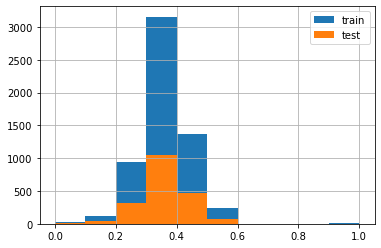

In [105]:
ax=y_train['Plant performance'].hist(label='train')
y_test['Plant performance'].hist(label='test',ax=ax)
plt.legend()

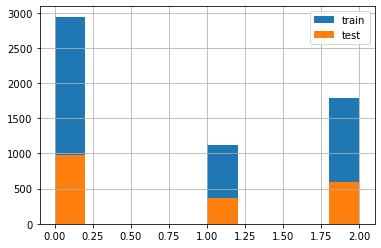

In [106]:
ax=y_train['Parameter'].hist(label='train')
y_test['Parameter'].hist(label='test',ax=ax)
plt.legend()

In [107]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [108]:
X_train

,Simultaneous,Sequential,Average temperature,Salt,Drought,Boron,Cd,UV,Ozone,Waterlogging,...,Family_Linaceae,Family_Malvaceae,Family_Piperaceae,Family_Poaceae,Family_Rosaceae,Family_Solanaceae,Family_Theaceae,Family_Vitaceae,Type_Abiotic-biotic,Type_Biotic-biotic
1791,0.0,1.0,24.80,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2170,1.0,0.0,21.35,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2794,0.0,0.0,20.60,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
3304,0.0,1.0,29.10,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1
6525,0.0,0.0,18.10,1,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0.0,0.0,27.70,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2198,1.0,0.0,14.95,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,1,0,0,0,1
7340,0.0,1.0,28.40,1,0,30.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2316,0.0,0.0,15.20,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,1,0,0,0,1


In [109]:
y.Parameter.value_counts()

0    3927
2    2376
1    1496
Name: Parameter, dtype: int64

In [110]:
X_train.shape,X_test.shape

((5849, 45), (1950, 45))

In [111]:
y_train.shape,y_test.shape

((5849, 2), (1950, 2))

In [112]:
y_train['Parameter'].value_counts()

0    2945
2    1782
1    1122
Name: Parameter, dtype: int64

In [113]:
def get_model(input_dim,norm):
    
    norm
    input_layer = keras.Input(shape=(input_dim,), name="input_layer")
    dense_1 = keras.layers.Dense(256, name = 'dense_1',activation='elu')(input_layer)
    drop_out1=keras.layers.Dropout(0.3,name='drop_out1')(dense_1)
    dense_2 = keras.layers.Dense(128, name = 'dense_2',activation='elu')(drop_out1)
    drop_out2=keras.layers.Dropout(0.2,name='drop_out2')(dense_2)
    dense_3=keras.layers.Dense(64,activation='elu',name='dense_3')(drop_out2)
    dense_4=keras.layers.Dense(32,activation='elu',name='dense_4')(dense_3)
    
    regression_output = keras.layers.Dense(1, activation = 'linear', name = 'regression_output')(dense_3)
    classification_output = keras.layers.Dense(3, activation = 'softmax', name = 'classification_output')(dense_3)
    model = keras.Model(inputs=input_layer,outputs=[regression_output, classification_output])
    
    return(model)

def get_predictions(model, df, y):
    
    predictions = model.predict(df)

    pdf = pd.DataFrame(predictions[1], columns = le.inverse_transform(list(range(3))))
    
    pdf=pd.concat([pdf,pd.Series(le.inverse_transform(np.argmax(predictions[1],axis=1)),name='predicted_class')],axis=1)
    #pdf['predicted_class'] = le.inverse_transform(np.argmax(predictions[1],axis=1))#pdf.predicted_proba >= 0.5
    #print(pdf.tail())
    pdf['actual_class'] = le.inverse_transform(y.Parameter.reset_index(drop=True))

    pdf['predicted_reg'] = predictions[0]

    pdf['actual_reg'] = y['Plant performance'].reset_index(drop=True)
    
    return(pdf)

def evaluate_model(df):
    
    precision = precision_score(df.actual_class, df.predicted_class,average='weighted')
    recall = recall_score(df.actual_class, df.predicted_class,average='weighted')
    accuracy=accuracy_score(df.actual_class, df.predicted_class)
    r2 = r2_score(df.actual_reg, df.predicted_reg)
    rmse=mean_squared_error(df.actual_reg, df.predicted_reg)**0.5
    metrics={'precision':precision,'recall':recall,'accuracy':accuracy,'r2':r2,'rmse':rmse}
    fig,axs=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
    cm = confusion_matrix(df['actual_class'], df['predicted_class'], normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(list(range(3))))
    disp.plot(cmap=plt.cm.Blues,ax=axs)
    plt.show()
    return(metrics)

In [114]:
#predictions = model.predict(X_train)
#predictions[1]
#pdf = pd.DataFrame(predictions[1], columns = le.inverse_transform(list(range(5))))
#pdf.head()

In [115]:
# def plot_loss(history):
#   plt.plot(history.history['loss'], label='loss')
#   plt.plot(history.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
#   plt.xlabel('Epoch')
#   plt.ylabel('Error Biomass')
#   plt.legend()
#   plt.grid(True)

### Train set

Training with different weights for regression and classification

[1, 100]
183/183 [==============================] - 1s 2ms/step


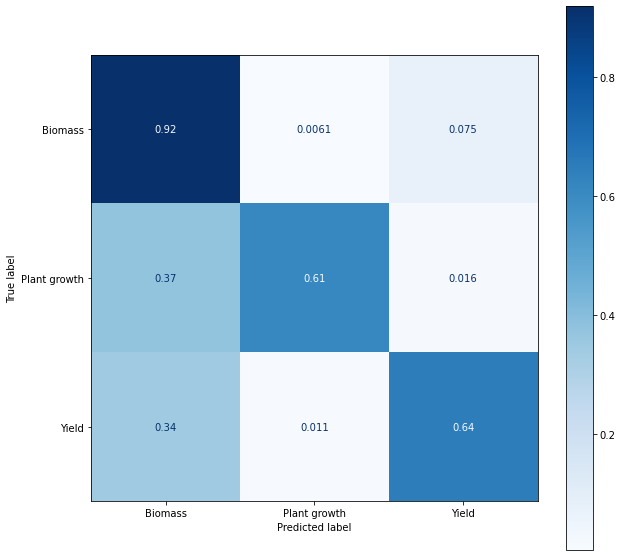

[1, 50]
183/183 [==============================] - 0s 2ms/step


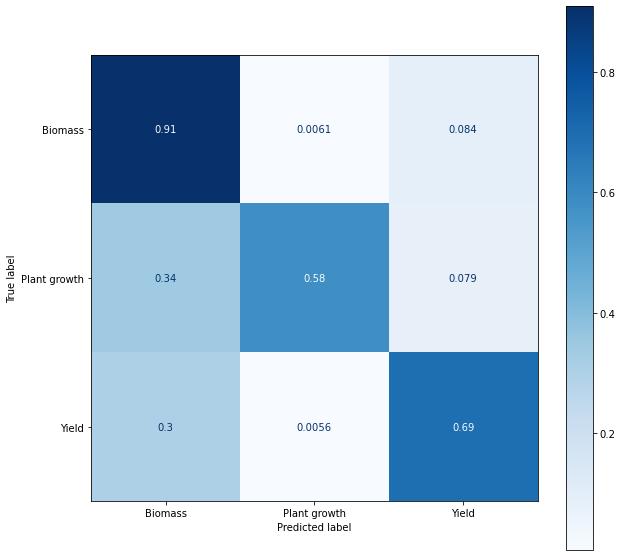

[1, 10]
183/183 [==============================] - 0s 2ms/step


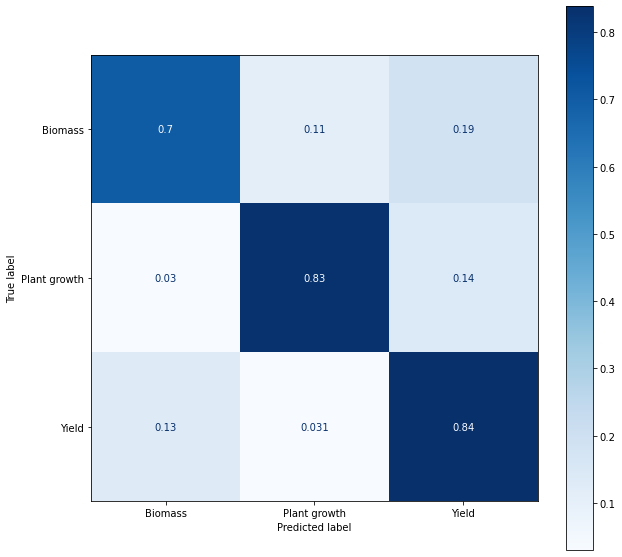

[1, 1]
183/183 [==============================] - 0s 2ms/step


C:\Users\manuk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


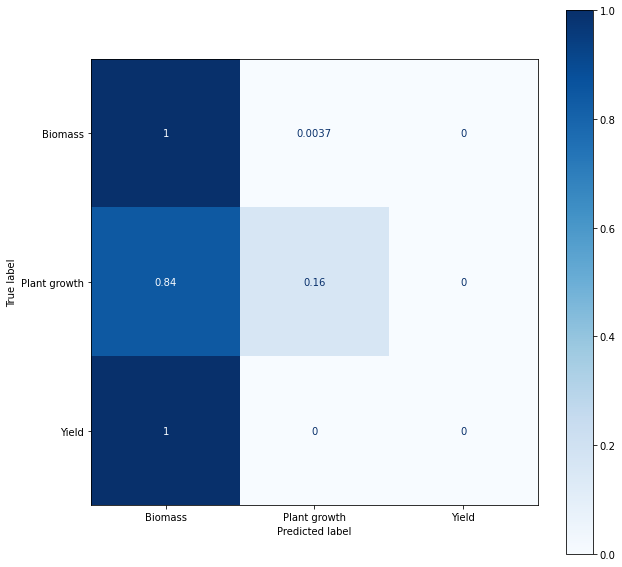

[10, 1]
183/183 [==============================] - 0s 2ms/step


C:\Users\manuk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


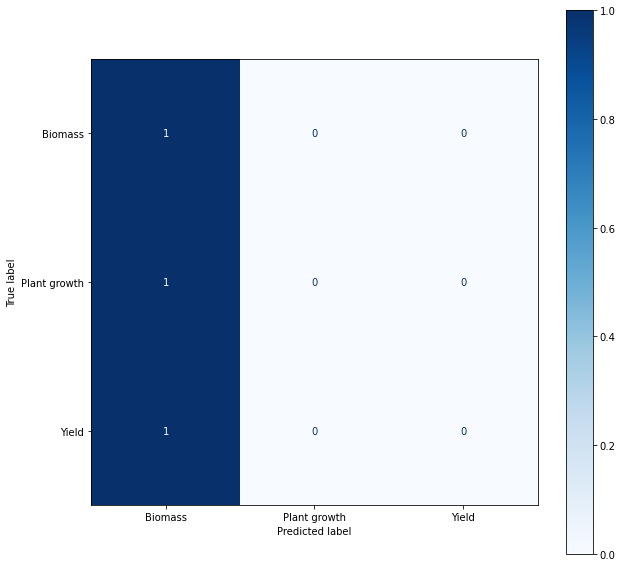

[50, 1]
183/183 [==============================] - 0s 2ms/step


C:\Users\manuk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


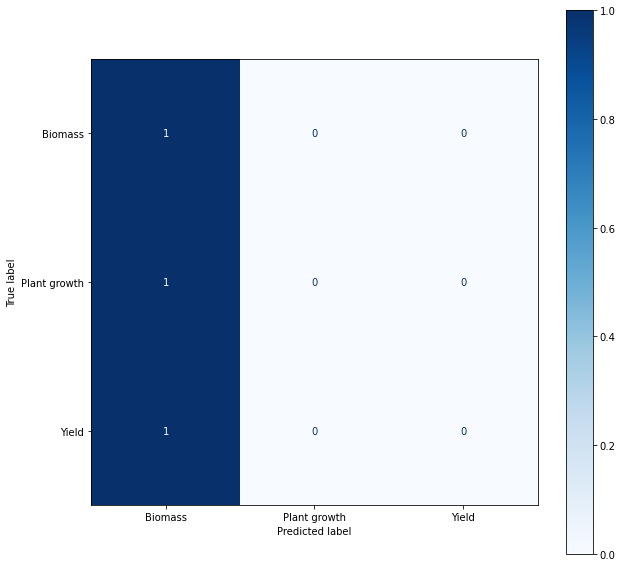

[100, 1]
183/183 [==============================] - 0s 2ms/step


C:\Users\manuk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


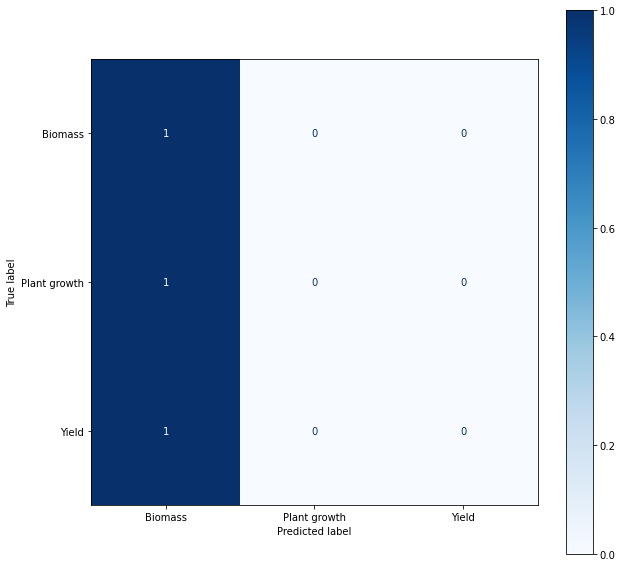

In [116]:
result_dict = {}

for loss_weight_param in ([1,100],[1,50],[1,10],[1,1],[10,1],[50,1],[100,1]):
    
    model = get_model(45,normalizer)
    #model = loaded_model
    
    model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.003),
               #tf.optimizers.Adam(learning_rate=0.001)],
    loss=[
        keras.losses.MeanSquaredError(),
        keras.losses.SparseCategoricalCrossentropy(),
    ],loss_weights = loss_weight_param)
    
    history_train=model.fit(X_train,
    {"regression_output": y_train['Plant performance'], "classification_output": y_train.Parameter},
    epochs=500,batch_size=50,verbose=0)
    
    reg_losses=history_train.history['regression_output_loss']
    class_losses=history_train.history['classification_output_loss']
    
    print(str(loss_weight_param))
    predictions = get_predictions(model, X_train, y_train)
    
    result_dict.update({str(loss_weight_param):evaluate_model(predictions)})

In [117]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 45)]         0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 256)          11776       ['input_layer[0][0]']            
                                                                                                  
 drop_out1 (Dropout)            (None, 256)          0           ['dense_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 128)          32896       ['drop_out1[0][0]']              
                                                                                            

[1, 100]
61/61 [==============================] - 0s 2ms/step


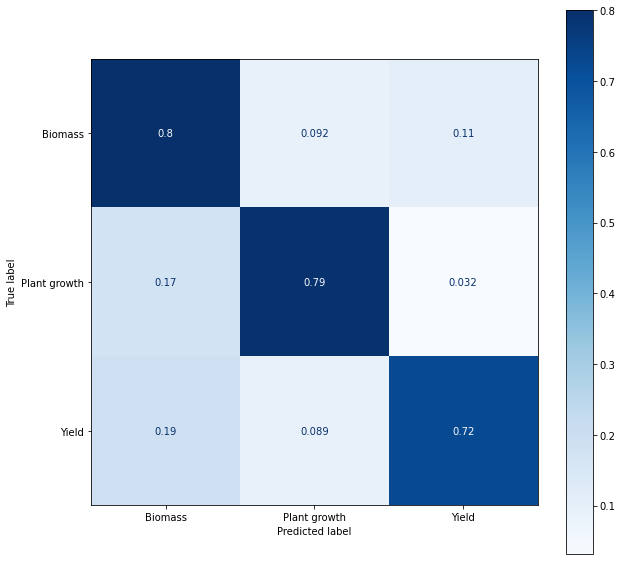

[1, 50]
61/61 [==============================] - 0s 2ms/step


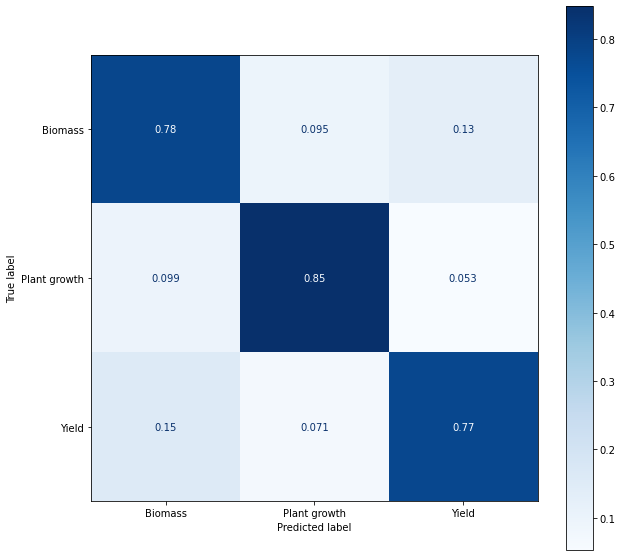

[1, 10]
61/61 [==============================] - 0s 2ms/step


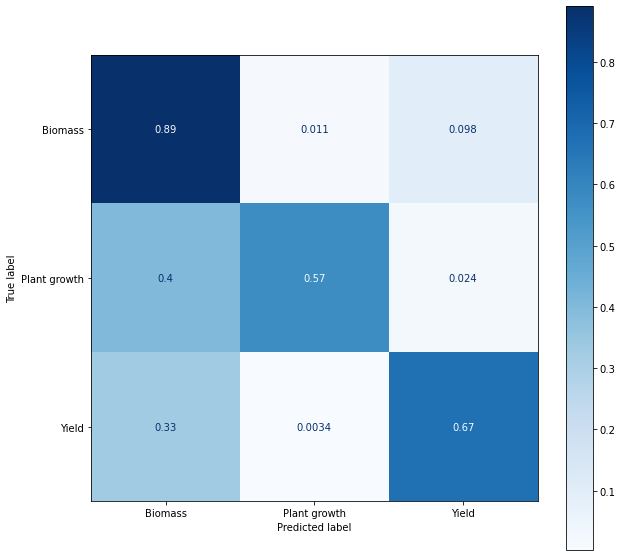

[1, 1]
61/61 [==============================] - 0s 3ms/step


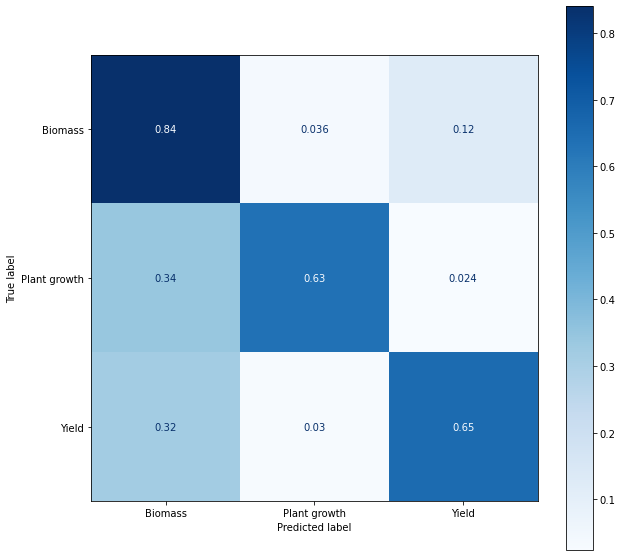

[10, 1]
61/61 [==============================] - 0s 2ms/step


C:\Users\manuk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


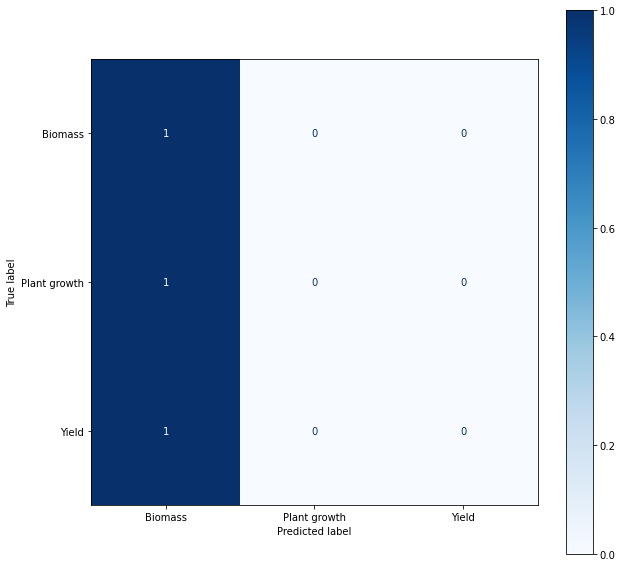

[50, 1]
61/61 [==============================] - 0s 2ms/step


C:\Users\manuk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


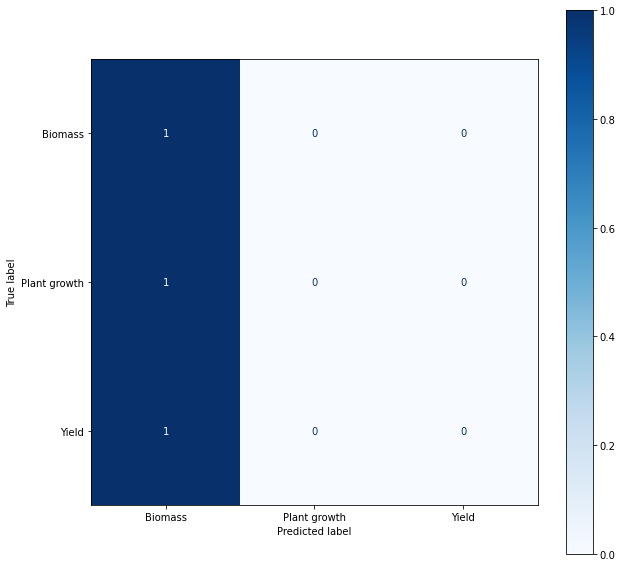

[100, 1]
61/61 [==============================] - 0s 2ms/step


C:\Users\manuk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


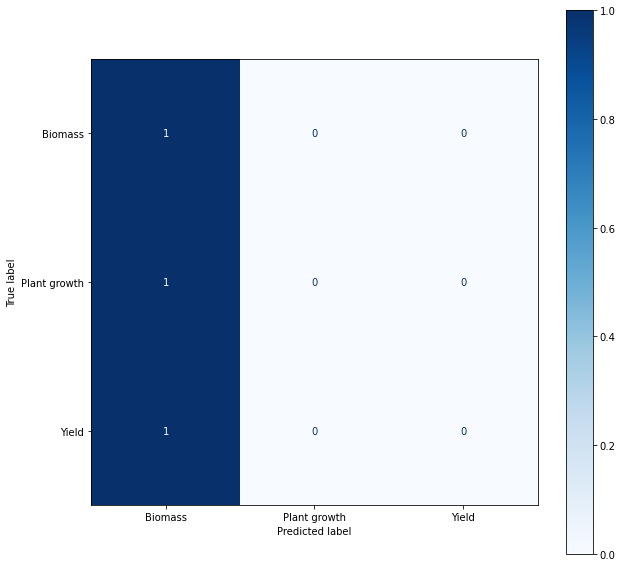

In [118]:
result_dict = {}

for loss_weight_param in ([1,100],[1,50],[1,10],[1,1],[10,1],[50,1],[100,1]):
    
    model = get_model(45,normalizer)
    
    model.compile(
    optimizer=#[tf.optimizers.Adam(learning_rate=0.01),
               tf.optimizers.Adam(learning_rate=0.003),
    loss=[
        keras.losses.MeanSquaredError(),
        keras.losses.SparseCategoricalCrossentropy(),
    ],loss_weights = loss_weight_param)
    
    model.fit(X_train,
    {"regression_output": y_train['Plant performance'], "classification_output": y_train.Parameter},
    epochs=200,batch_size=50,verbose=0)
    
    print(str(loss_weight_param))
    predictions = get_predictions(model, X_test, y_test)
    
    result_dict.update({str(loss_weight_param):evaluate_model(predictions)})

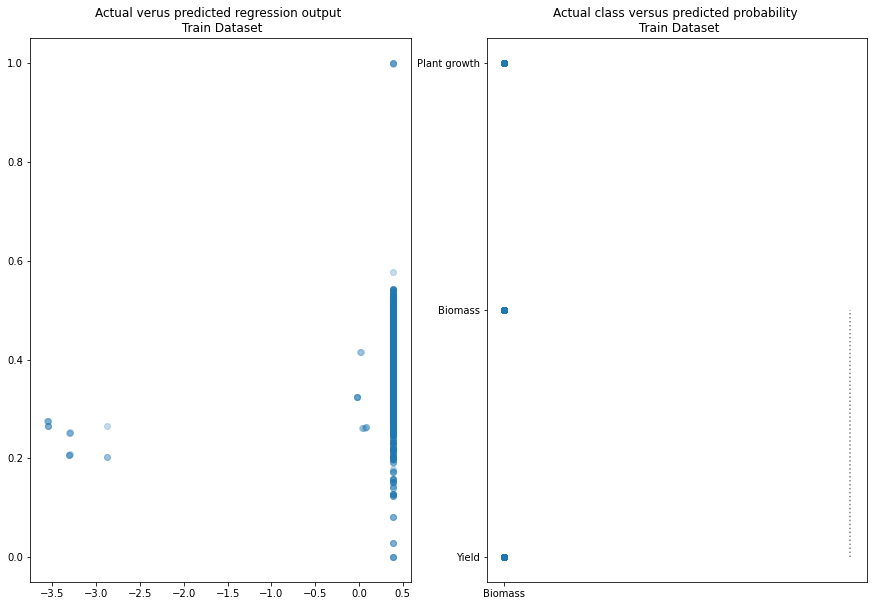

In [119]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(predictions.predicted_reg, predictions.actual_reg, alpha = 0.25)
plt.title('Actual verus predicted regression output \n Train Dataset')
plt.subplot(1,2,2)
plt.scatter(predictions.predicted_class, predictions.actual_class, alpha = 0.25)
plt.title('Actual class versus predicted probability \n Train Dataset')
plt.vlines(x = 0.5, ymin=0, ymax=1, color ='k', linestyle = ':', alpha = 0.5)


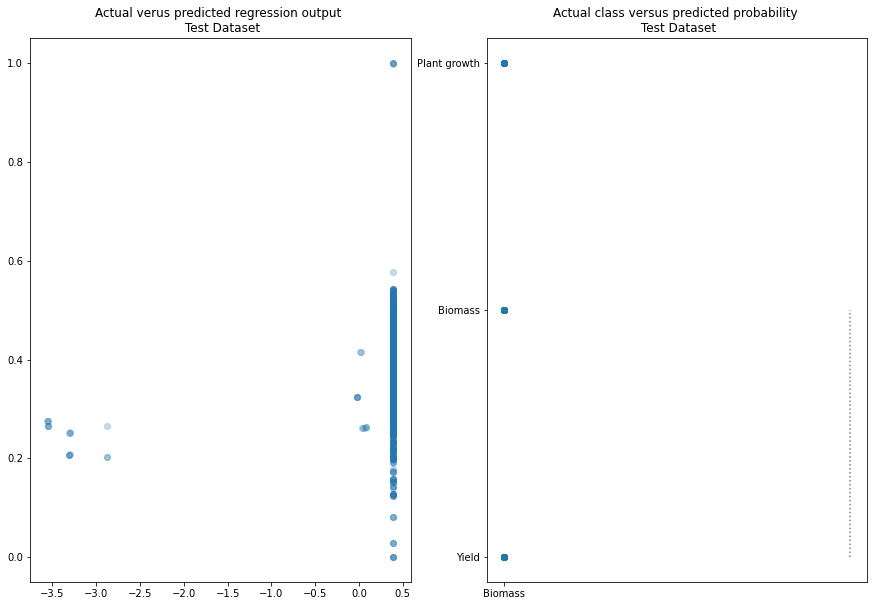

In [120]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(predictions.predicted_reg, predictions.actual_reg, alpha = 0.25)
plt.title('Actual verus predicted regression output \n Test Dataset')
plt.subplot(1,2,2)
plt.scatter(predictions.predicted_class, predictions.actual_class, alpha = 0.25)
plt.title('Actual class versus predicted probability \n Test Dataset')
plt.vlines(x = 0.5, ymin=0, ymax=1, color ='k', linestyle = ':', alpha = 0.5)


In [121]:
r2_list = list()
prec_list = list()
rec_list = list()
acc_list=list()
rmse_list=list()

for i in result_dict.values():
    r2_list.append(i['r2'])
    prec_list.append(i['precision'])
    rec_list.append(i['recall'])
    acc_list.append(i['accuracy'])
    rmse_list.append(i['rmse'])

In [122]:
r2_list

[-18.14959354126411,
 -0.7586415582716377,
 -0.4093476648203429,
 -0.7652568064134826,
 -0.04402959705877629,
 -0.6145112881275396,
 -15.34399377470448]

In [123]:
r2_list

[-18.14959354126411,
 -0.7586415582716377,
 -0.4093476648203429,
 -0.7652568064134826,
 -0.04402959705877629,
 -0.6145112881275396,
 -15.34399377470448]

In [124]:
acc_list

[0.7753846153846153,
 0.7897435897435897,
 0.7630769230769231,
 0.7435897435897436,
 0.5035897435897436,
 0.5035897435897436,
 0.5035897435897436]

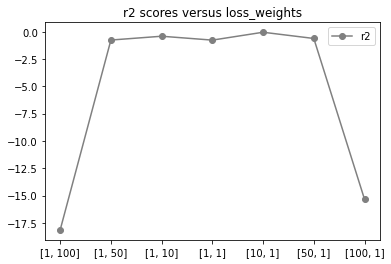

In [125]:
plt.plot(list(result_dict.keys()),r2_list, marker = 'o', label = 'r2', color ='grey')
plt.title('r2 scores versus loss_weights')
plt.legend()

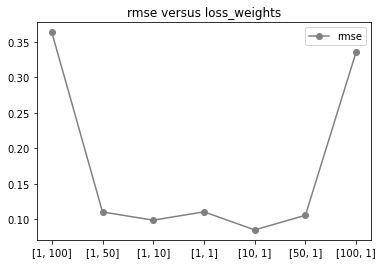

In [126]:
plt.plot(list(result_dict.keys()),rmse_list, marker = 'o', label = 'rmse', color ='grey')
plt.title('rmse versus loss_weights')
plt.legend()

After comparing the various metrics and the trade off between them, it is best to go with equal weights for both regression and classification outputs.

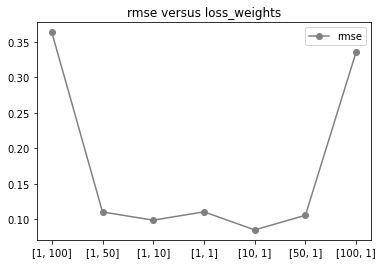

In [127]:
plt.plot(list(result_dict.keys()),rmse_list, marker = 'o', label = 'rmse', color ='grey')
plt.title('rmse versus loss_weights')
plt.legend()

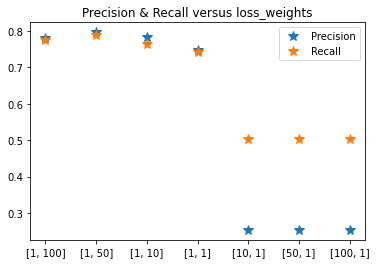

In [128]:
fig, ax = plt.subplots()

ax.plot(list(result_dict.keys()), prec_list, marker = '*', markersize = 10, linestyle = '', label = 'Precision')
ax.plot(rec_list, marker ='*', markersize = 10, linestyle = '', label = 'Recall')
plt.title('Precision & Recall versus loss_weights')
plt.legend()
plt.show()

### Equal Weight - (1,1)

In [129]:
model = get_model(45,normalizer)
   
model.compile(
    optimizer=#[tf.optimizers.Adam(learning_rate=0.003),
               tf.optimizers.Adam(learning_rate=0.003),
    loss=[
        keras.losses.MeanSquaredError(),
        keras.losses.SparseCategoricalCrossentropy(),
    ],loss_weights = [1,10], metrics=[keras.metrics.RootMeanSquaredError(),keras.metrics.SparseCategoricalAccuracy()])
    
history=model.fit(X_train,
    {"regression_output": y_train['Plant performance'], "classification_output": y_train.Parameter},
    epochs=500,batch_size=50,verbose=0,validation_split=0.2)

In [130]:
history.history.keys()

dict_keys(['loss', 'regression_output_loss', 'classification_output_loss', 'regression_output_root_mean_squared_error', 'regression_output_sparse_categorical_accuracy', 'classification_output_root_mean_squared_error', 'classification_output_sparse_categorical_accuracy', 'val_loss', 'val_regression_output_loss', 'val_classification_output_loss', 'val_regression_output_root_mean_squared_error', 'val_regression_output_sparse_categorical_accuracy', 'val_classification_output_root_mean_squared_error', 'val_classification_output_sparse_categorical_accuracy'])

Text(0.5, 1.0, 'loss(mse) for regression')

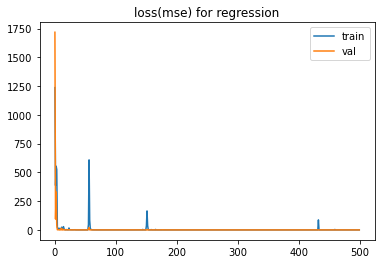

In [131]:
plt.plot(history.history['regression_output_loss'])
plt.plot(history.history['val_regression_output_loss'])
plt.legend(['train','val'])
plt.title('loss(mse) for regression')

Text(0.5, 1.0, 'loss(sparse categorical cross entropy) for classification')

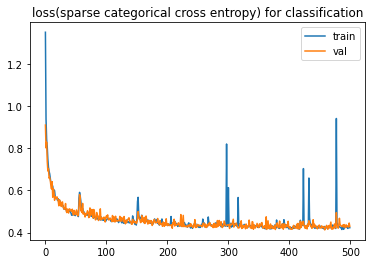

In [132]:
plt.plot(history.history['classification_output_loss'])
plt.plot(history.history['val_classification_output_loss'])
plt.legend(['train','val'])
plt.title('loss(sparse categorical cross entropy) for classification')

Text(0.5, 1.0, 'rmse for regression output')

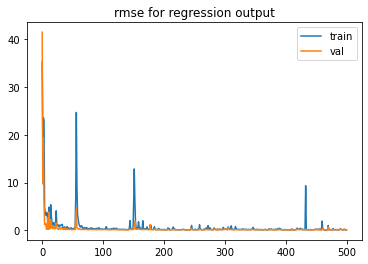

In [133]:
plt.plot(history.history['regression_output_root_mean_squared_error'])
plt.plot(history.history['val_regression_output_root_mean_squared_error'])
plt.legend(['train','val'])
plt.title('rmse for regression output')

Text(0.5, 1.0, 'accuracy for classification output')

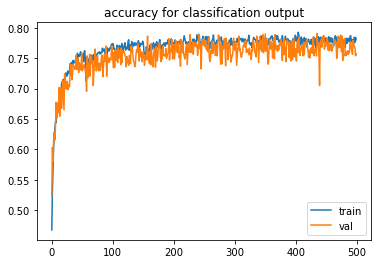

In [134]:
plt.plot(history.history['classification_output_sparse_categorical_accuracy'])
plt.plot(history.history['val_classification_output_sparse_categorical_accuracy'])
plt.legend(['train','val'])
plt.title('accuracy for classification output')

In [135]:
def evaluation(pdf):
  precision = precision_score(pdf.actual_class, pdf.predicted_class,average='weighted')
  recall = recall_score(pdf.actual_class, pdf.predicted_class,average='weighted')
  accuracy=accuracy_score(pdf.actual_class, pdf.predicted_class)
  r2 = r2_score(pdf.actual_reg, pdf.predicted_reg)
  rmse=mean_squared_error(pdf.actual_reg, pdf.predicted_reg)**0.5
  metrics={'precision':precision,'recall':recall,'accuracy':accuracy,'r2':r2,'rmse':rmse}
  fig,axs=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
  cm = confusion_matrix(pdf['actual_class'], pdf['predicted_class'], normalize='true')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(list(range(3))))
  disp.plot(cmap=plt.cm.Blues,ax=axs)
  return metrics

In [136]:
#fitting on entire training set

model.fit(X_train,
    {"regression_output": y_train['Plant performance'], "classification_output": y_train.Parameter},
    epochs=500,batch_size=50,verbose=0)

61/61 [==============================] - 0s 3ms/step


{'precision': 0.7853423107951796,
 'recall': 0.7805128205128206,
 'accuracy': 0.7805128205128206,
 'r2': -0.25886048247780913,
 'rmse': 0.09323339836424267}

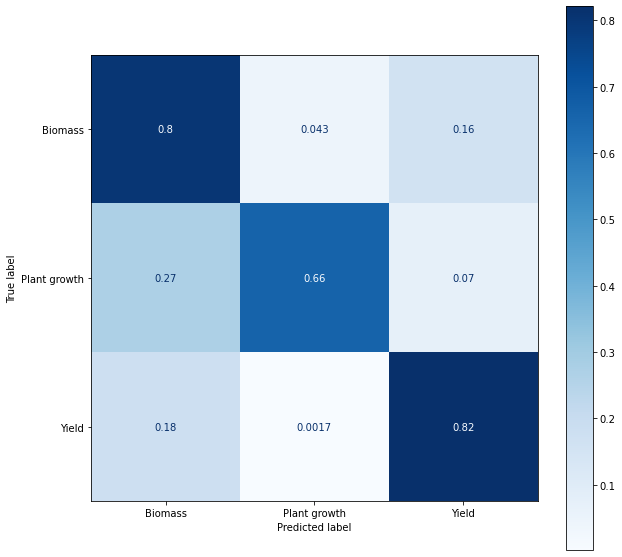

In [142]:
pdf=get_predictions(model, X_test, y_test)
metrics=evaluation(pdf)
metrics

61/61 [==============================] - 0s 3ms/step


{'precision': 0.7853423107951796,
 'recall': 0.7805128205128206,
 'accuracy': 0.7805128205128206,
 'r2': -0.25886048247780913,
 'rmse': 0.09323339836424267}

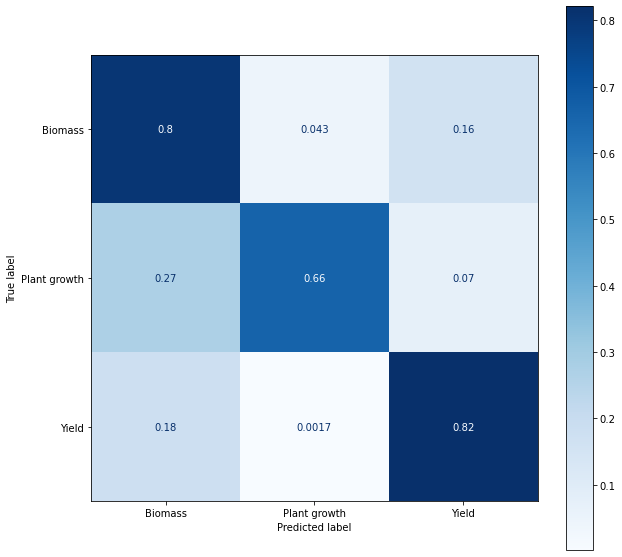

In [143]:
pdf=get_predictions(model, X_test, y_test)
#pdf.info()
#evaluate_model(pdf)
precision = precision_score(pdf.actual_class, pdf.predicted_class,average='weighted')
recall = recall_score(pdf.actual_class, pdf.predicted_class,average='weighted')
accuracy=accuracy_score(pdf.actual_class, pdf.predicted_class)
r2 = r2_score(pdf.actual_reg, pdf.predicted_reg)
rmse=mean_squared_error(pdf.actual_reg, pdf.predicted_reg)**0.5
metrics={'precision':precision,'recall':recall,'accuracy':accuracy,'r2':r2,'rmse':rmse}
fig,axs=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
cm = confusion_matrix(pdf['actual_class'], pdf['predicted_class'], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(list(range(3))))
disp.plot(cmap=plt.cm.Blues,ax=axs)
#plt.show()
metrics

183/183 [==============================] - 1s 3ms/step


{'precision': 0.8025638940998249,
 'recall': 0.7967173875876218,
 'accuracy': 0.7967173875876218,
 'r2': -0.31378697849344706,
 'rmse': 0.09200971052572013}

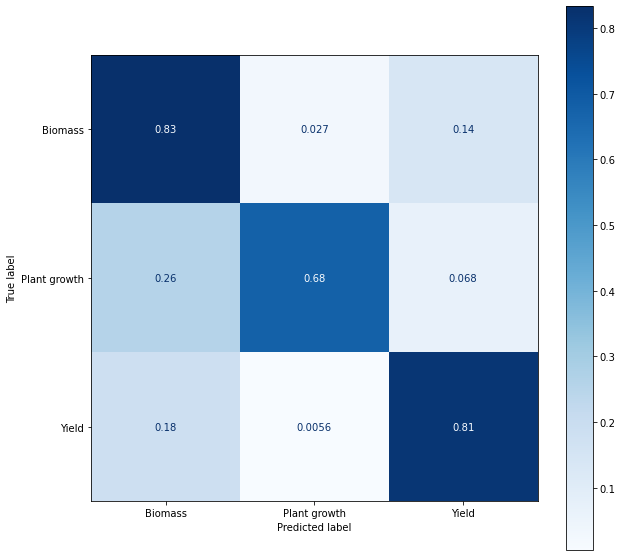

In [144]:
pdf=get_predictions(model, X_train, y_train)
metrics=evaluation(pdf)
metrics

In [145]:
X_test.head()

,Simultaneous,Sequential,Average temperature,Salt,Drought,Boron,Cd,UV,Ozone,Waterlogging,...,Family_Linaceae,Family_Malvaceae,Family_Piperaceae,Family_Poaceae,Family_Rosaceae,Family_Solanaceae,Family_Theaceae,Family_Vitaceae,Type_Abiotic-biotic,Type_Biotic-biotic
2831,1.0,0.0,18.30,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,1,0,0,0,1
1642,0.0,1.0,23.25,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1259,0.0,0.0,22.90,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3987,0.0,0.0,17.40,0,0,30.0,0.0,1.0,0.0,1,...,0,0,0,0,0,1,0,0,1,0
1708,0.0,0.0,18.45,0,0,30.0,0.0,1.0,0.0,0,...,0,0,0,0,0,1,0,0,0,1


In [146]:
le.inverse_transform([0,1,2])

array(['Biomass', 'Plant growth', 'Yield'], dtype=object)

In [147]:
y_test.head()

,Plant performance,Parameter
2831,0.199039,2
1642,0.080897,0
1259,0.340809,0
3987,0.315178,1
1708,0.403017,2


In [148]:
pdf.head()

,Biomass,Plant growth,Yield,predicted_class,actual_class,predicted_reg,actual_reg
0,0.331463,2.026464e-05,6.685167e-01,Yield,Yield,0.335304,0.457749
1,0.504315,1.884970e-04,4.954970e-01,Biomass,Biomass,0.333100,0.342811
2,1.000000,1.028899e-12,8.550483e-09,Biomass,Biomass,0.371386,0.337872
3,0.699418,9.108231e-08,3.005821e-01,Biomass,Yield,0.334965,0.406221
4,0.490103,4.054332e-03,5.058427e-01,Yield,Yield,0.331870,0.505433


df1.drop(['Plant performance','Parameter'],axis=1), y

183/183 [==============================] - 1s 3ms/step


{'precision': 0.8025638940998249,
 'recall': 0.7967173875876218,
 'accuracy': 0.7967173875876218,
 'r2': -0.31378697849344706,
 'rmse': 0.09200971052572013}

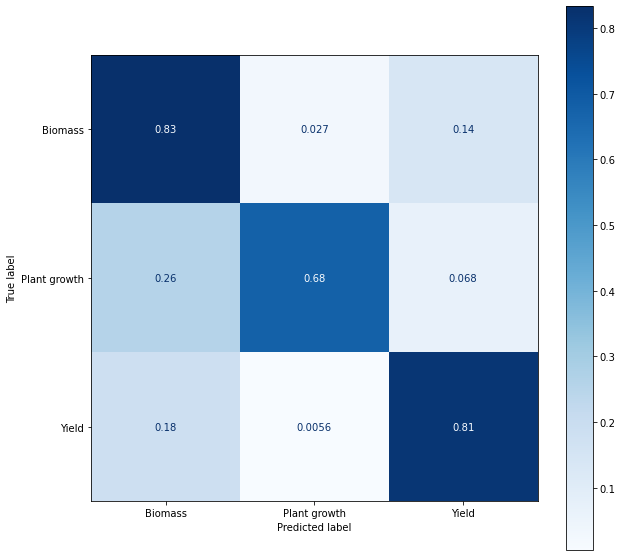

In [149]:
train_pdf=get_predictions(model,X_train,y_train)
metrics=evaluation(train_pdf)
metrics

In [150]:
train_pdf.head()

,Biomass,Plant growth,Yield,predicted_class,actual_class,predicted_reg,actual_reg
0,0.331463,2.026464e-05,6.685167e-01,Yield,Yield,0.335304,0.457749
1,0.504315,1.884970e-04,4.954970e-01,Biomass,Biomass,0.333100,0.342811
2,1.000000,1.028899e-12,8.550483e-09,Biomass,Biomass,0.371386,0.337872
3,0.699418,9.108231e-08,3.005821e-01,Biomass,Yield,0.334965,0.406221
4,0.490103,4.054332e-03,5.058427e-01,Yield,Yield,0.331870,0.505433


(-0.00099665, 0.0191]    1170
(0.0191, 0.045]          1170
(0.0726, 0.117]          1170
(0.117, 0.669]           1170
(0.045, 0.0726]          1169
Name: reg_diff, dtype: int64

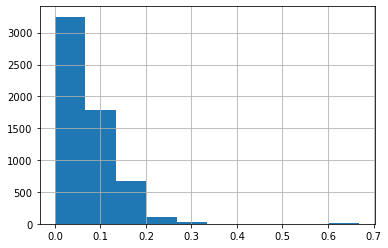

In [151]:
train_pdf['reg_diff']=np.abs(train_pdf.actual_reg-train_pdf.predicted_reg)
train_pdf['reg_diff'].hist()
pd.qcut(train_pdf['reg_diff'],5).value_counts()

In [152]:
train_pdf['diff']=(train_pdf['reg_diff']<0.1)*1
#train_pdf['diff']=train_pdf['diff']*1 
train_pdf['diff'].value_counts()/len(train_pdf)

1    0.736707
0    0.263293
Name: diff, dtype: float64

In [153]:
dttrain=pd.concat([X_train.reset_index(),train_pdf],axis=1)
dttrain.head()

,index,Simultaneous,Sequential,Average temperature,Salt,Drought,Boron,Cd,UV,Ozone,...,Type_Biotic-biotic,Biomass,Plant growth,Yield,predicted_class,actual_class,predicted_reg,actual_reg,reg_diff,diff
0,1791,0.0,1.0,24.80,0,0,30.0,0.0,1.0,0.0,...,1,0.331463,2.026464e-05,6.685167e-01,Yield,Yield,0.335304,0.457749,0.122445,0
1,2170,1.0,0.0,21.35,0,0,30.0,0.0,1.0,0.0,...,1,0.504315,1.884970e-04,4.954970e-01,Biomass,Biomass,0.333100,0.342811,0.009711,1
2,2794,0.0,0.0,20.60,0,0,30.0,0.0,1.0,0.0,...,1,1.000000,1.028899e-12,8.550483e-09,Biomass,Biomass,0.371386,0.337872,0.033514,1
3,3304,0.0,1.0,29.10,0,0,30.0,0.0,1.0,0.0,...,1,0.699418,9.108231e-08,3.005821e-01,Biomass,Yield,0.334965,0.406221,0.071256,1
4,6525,0.0,0.0,18.10,1,0,30.0,0.0,1.0,0.0,...,0,0.490103,4.054332e-03,5.058427e-01,Yield,Yield,0.331870,0.505433,0.173563,0


In [154]:
dftrain_0=df[df.index.isin(dttrain[dttrain['diff']==0]['index'])]

(-0.00099665, 0.0191]    1170
(0.0191, 0.045]          1170
(0.0726, 0.117]          1170
(0.117, 0.669]           1170
(0.045, 0.0726]          1169
Name: reg_diff, dtype: int64

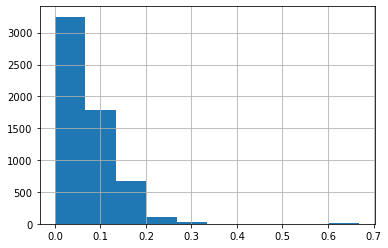

In [155]:
pdf['reg_diff']=np.abs(pdf.actual_reg-pdf.predicted_reg)
pdf['reg_diff'].hist()
pd.qcut(pdf['reg_diff'],5).value_counts()

In [156]:
pdf['diff']=(pdf['reg_diff']<0.1)*1
#train_pdf['diff']=train_pdf['diff']*1 
pdf['diff'].value_counts()/len(pdf)

1    0.736707
0    0.263293
Name: diff, dtype: float64

In [157]:
dt=pd.concat([X_test.reset_index(),pdf],axis=1)
dt.head()
dftest_0=df[df.index.isin(dt[dt['diff']==0]['index'])]

In [158]:
df_0=pd.concat([dftrain_0,dftest_0])
df_0.shape

(2047, 30)

In [160]:
model_json = model.to_json()
with open("model_elu.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_elu.h5")
print("Saved model to disk")

Saved model to disk


In [162]:
# load json and create model
json_file = open('model_elu.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_elu.h5")
print("Loaded model from disk")

Loaded model from disk


In [163]:
#X_train1 = pd.read_csv('X_validation_rama.csv')
X_train1 = pd.read_csv('X_train_tanh1.csv')
X_test1 = pd.read_csv('X_test_tanh1.csv')
#y_train1 = pd.read_csv('y_Validation_rama.csv')
y_train1 = pd.read_csv('y_train_tanh1.csv')
y_test1 = pd.read_csv('y_test_tanh1.csv')


In [164]:
X_test1.drop(X_test1.columns[[0]],axis=1, inplace=True)
y_test1.drop(y_test1.columns[[0]],axis=1, inplace=True)
X_train1.drop(X_train1.columns[[0]],axis=1, inplace=True)
y_train1.drop(y_train1.columns[[0]],axis=1, inplace=True)

183/183 [==============================] - 1s 2ms/step


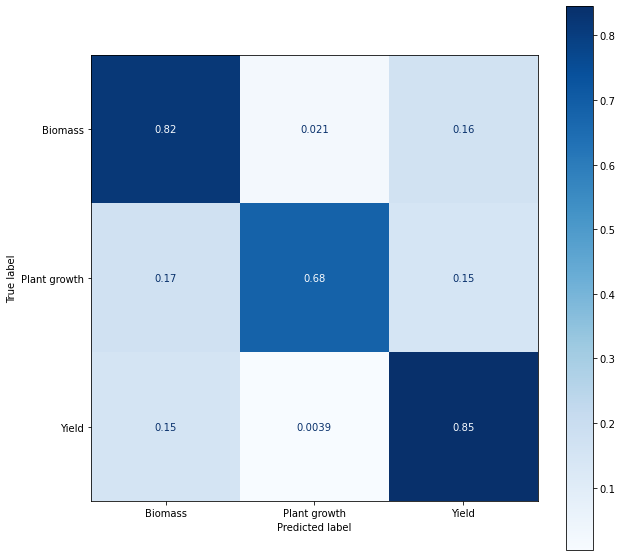

{'precision': 0.8119806946981,
 'recall': 0.7994528979312703,
 'accuracy': 0.7994528979312703,
 'r2': -0.08988087642809828,
 'rmse': 0.0850578436875815,
 'f1:': 0.800262082634752,
 'mcc:': 0.6770137897471172,
 'specificity': array([0.7171576 , 0.96465643, 0.73202974])}

In [165]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef


pdf=get_predictions(loaded_model, X_train1, y_train1)
#pdf.info()
#evaluate_model(pdf)
precision = precision_score(pdf.actual_class, pdf.predicted_class,average='weighted')
recall = recall_score(pdf.actual_class, pdf.predicted_class,average='weighted')
accuracy=accuracy_score(pdf.actual_class, pdf.predicted_class)
r2 = r2_score(pdf.actual_reg, pdf.predicted_reg)
rmse=mean_squared_error(pdf.actual_reg, pdf.predicted_reg)**0.5
f1 = f1_score(pdf.actual_class, pdf.predicted_class, average='weighted')
mcc = matthews_corrcoef(pdf.actual_class, pdf.predicted_class)

metrics={'precision':precision,'recall':recall,'accuracy':accuracy,'r2':r2,'rmse':rmse, 'f1:': f1, 'mcc:' : mcc}
fig,axs=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
cm = confusion_matrix(pdf['actual_class'], pdf['predicted_class'], normalize='true')
#cm2 = confusion_matrix(pdf['actual_class'], pdf['predicted_class'])
#specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
tn = cm.diagonal(0)  # True negatives
fp = cm.sum(axis=0) - tn  # False positives
#tn, fp, fn, tp = cm2.ravel()
specificity = tn / (tn + fp)
#f1_score = 2 * tp / (2 * tp + cm[0, 1] + fn)
metrics={'precision':precision,'recall':recall,'accuracy':accuracy,'r2':r2,'rmse':rmse, 'f1:': f1, 'mcc:' : mcc,'specificity' :specificity }
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(list(range(3))))
disp.plot(cmap=plt.cm.Blues,ax=axs)
plt.show()
metrics


In [ ]:
from google.colab import files
pdf.to_csv('plant_performance_predictions.csv') 
files.download('plant_performance_predictions.csv')